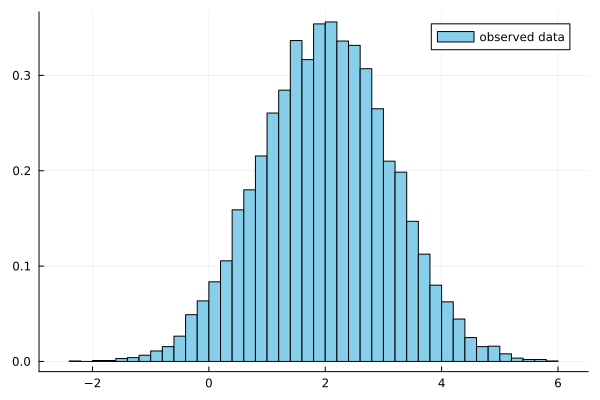

In [1]:
using Distributions
using Plots


μ_true = 2.0
σ_true = 1.1
n = 10000
x = rand(Normal(μ_true, σ_true), n)

histogram(x, normalize=:pdf, label="observed data", color="skyblue")

In [4]:
include("rwmh.jl")

function log_likel(y::Vector)    
    μ, σ = y[1], y[2]
    return sum(logpdf.(Normal(μ, σ), x))
end

f = ConcatBijection(
        CompositeBijection(ExpBijection(), TranslateBijection(1.0)),
        ExpBijection()
    )
rwmh = RandomWalkMetropolisHastings(f; dim=2)
        
initialize!(rwmh, transform([randn(), randn()], rwmh.f))

num_steps = 10000
burn_in = 5000
thin = 5
μs = []
σs = []
accrs = []
for i in 1:num_steps
    mh_step!(rwmh, log_likel)
    push!(accrs, acc_rate(rwmh))
    if i > burn_in && (i % thin) == 0
        μ, σ = get(rwmh)
        push!(μs, μ)
        push!(σs, σ)
    end
end


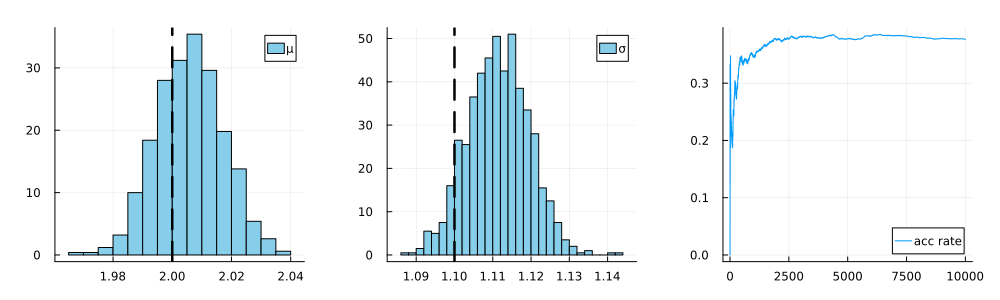

In [5]:
using Plots
using Measures: mm

ps = []
p = histogram(μs, label="μ", normalize=:pdf, color="skyblue")
vline!([μ_true], label=nothing, color="black", linewidth=2.5, linestyle=:dash)
push!(ps, p)

p = histogram(σs, label="σ", normalize=:pdf, color="skyblue")
vline!([σ_true], label=nothing, color="black", linewidth=2.5, linestyle=:dash)
push!(ps, p)

p = plot(1:num_steps, accrs, label="acc rate")
push!(ps, p)

p = plot(ps..., layout=(1,3), size=(1000, 300), margin=5mm)
